# Machine Learning Pipeline - Model Training

In this notebook, we pick up the transformed datasets and the selected variables that we saved in the previous notebooks.

# Reproducibility: Setting the seed

With the aim to ensure reproducibility between runs of the same notebook, but also between the research and production environment, for each step that includes some element of randomness, it is extremely important that we **set the seed**.

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load the train and test set with the engineered variables



X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,saletype,salecondition,lotfrontage_na,masvnrarea_na,garageyrblt_na
0,0.454545,0.666667,0.388581,0.0,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.238095,0.4,1.0,1.0,0.2,0.444444,0.571429,0.492647,0.950820,0.0,0.0,0.3,0.4,0.333333,0.00000,0.333333,0.5,0.25,0.333333,0.666667,0.0,0.8,0.055280,0.0,0.0,0.190068,0.123732,1.0,0.000000,0.0,0.333333,0.309142,0.183051,0.0,0.432412,0.333333,0.0,0.333333,0.5,0.375,0.5,0.333333,0.416667,1.0,0.000000,0.0,0.25,0.626168,0.0,0.25,0.169252,0.5,0.5,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.272727,0.666667,0.25,0.0,0.0,0.0
1,0.818182,0.666667,0.429425,0.0,1.0,1.0,0.666667,0.333333,1.0,0.00,0.0,0.666667,0.4,1.0,1.0,0.6,0.666667,0.428571,0.058824,0.131148,0.0,0.0,0.9,1.0,0.333333,0.00000,0.666667,0.5,1.00,0.666667,0.666667,0.0,0.0,0.000000,0.0,0.0,0.604880,0.231260,1.0,1.000000,1.0,1.000000,0.550351,0.000000,0.0,0.514455,0.000000,0.0,0.666667,0.0,0.375,0.5,0.666667,0.333333,1.0,0.000000,0.0,0.75,0.074766,0.5,0.50,0.426657,0.5,0.5,1.0,0.000000,0.060329,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0
2,1.000000,0.666667,0.558672,0.0,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.666667,0.4,1.0,1.0,1.0,0.666667,0.428571,0.029412,0.081967,0.0,0.0,0.9,1.0,0.333333,0.00000,0.666667,0.5,1.00,0.666667,0.666667,0.0,1.0,0.124026,0.0,0.0,0.092466,0.149918,1.0,1.000000,1.0,1.000000,0.383441,0.455690,0.0,0.607647,0.333333,0.0,0.666667,0.5,0.375,0.5,0.666667,0.500000,1.0,0.000000,0.0,1.00,0.037383,0.5,0.50,0.346968,0.5,0.5,1.0,0.198370,0.166362,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0
3,0.818182,0.666667,0.445638,0.0,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.380952,0.4,1.0,1.0,0.6,0.444444,0.571429,0.323529,0.737705,0.0,0.0,0.9,1.0,0.333333,0.00000,0.333333,0.5,0.50,0.333333,0.666667,0.0,0.6,0.059887,0.4,1.0,0.051798,0.151391,1.0,1.000000,1.0,1.000000,0.385492,0.000000,0.0,0.360349,0.000000,0.5,0.333333,0.0,0.250,0.5,0.333333,0.250000,1.0,0.000000,0.0,0.25,0.411215,0.0,0.25,0.302539,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
4,0.818182,0.666667,0.406640,0.0,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.619048,0.4,1.0,1.0,0.6,0.666667,0.428571,0.088235,0.196721,0.0,0.0,0.6,0.5,0.666667,0.02375,0.333333,0.5,1.00,0.666667,1.000000,0.0,0.0,0.000000,0.0,0.0,0.529538,0.202455,1.0,0.666667,1.0,1.000000,0.500348,0.000000,0.0,0.467713,0.000000,0.0,0.666667,0.0,0.375,0.5,0.333333,0.333333,1.0,0.333333,0.6,0.75,0.112150,1.0,0.50,0.283498,0.5,0.5,1.0,0.298913,0.038391,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0


In [3]:
X_train.shape

(1314, 81)

In [4]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

,saleprice
0,11.744037
1,12.139399
2,12.206073
3,11.674194
4,12.078239


In [5]:
y_train.shape

(1314, 1)

In [12]:
# load the pre-selected features
# ==============================

# we selected the features in the previous notebook (step 3)



features = pd.read_csv('selected_features.csv')
print(features.head())
features = features['0'].to_list()

# display final feature set
features

             0
0   mssubclass
1     mszoning
2     lotshape
3  landcontour
4    lotconfig


['mssubclass',
 'mszoning',
 'lotshape',
 'landcontour',
 'lotconfig',
 'neighborhood',
 'bldgtype',
 'overallqual',
 'overallcond',
 'yearremodadd',
 'roofstyle',
 'exterior1st',
 'exterqual',
 'foundation',
 'bsmtqual',
 'bsmtexposure',
 'bsmtfintype1',
 'heatingqc',
 'centralair',
 '1stflrsf',
 'grlivarea',
 'bsmtfullbath',
 'fullbath',
 'halfbath',
 'kitchenqual',
 'totrmsabvgrd',
 'functional',
 'fireplaces',
 'fireplacequ',
 'garagefinish',
 'garagecars',
 'garagearea',
 'paveddrive',
 'wooddecksf',
 'screenporch',
 'saletype',
 'salecondition']

In [15]:
# Reduce the training and the test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

X_train.shape

(1314, 37)

### Regularised linear regression: Lasso

Remember to set the seed.

In [16]:
# set up the model
# remember to set the random_state / seed

lin_model = Lasso(alpha=0.001, random_state=0)

# train the model

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [17]:
# evaluate the model:
# ====================

# remember that we log transformed the output (SalePrice)
# in our feature engineering notebook (step 2).

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original house prices values.

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 824140568
train rmse: 28707
train r2: 0.8664572225546651

test mse: 641667860
test rmse: 25331
test r2: 0.9147320278247774

Average house price:  163000


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

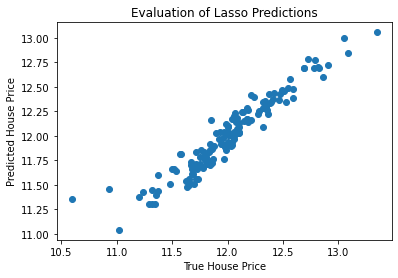

In [18]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

### We can see that our model is doing a pretty good job at estimating house prices.

In [21]:
y_test.reset_index(drop=True)

,saleprice
0,12.352335
1,12.097930
2,11.711776
3,11.344507
4,11.863582
...,...
141,12.513557
142,12.081076
143,12.363076
144,10.596635


In [22]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(lin_model.predict(X_test))

preds

0      12.261576
1      12.083742
2      11.556515
3      11.302934
4      11.725257
         ...    
141    12.452973
142    12.177722
143    12.220132
144    11.356679
145    12.223682
Length: 146, dtype: float64

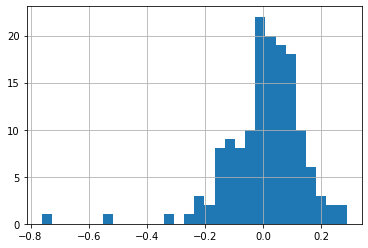

In [25]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test['saleprice'] - preds
errors.hist(bins=30)
plt.show()

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

Text(0.5, 1.0, 'Feature Importance')

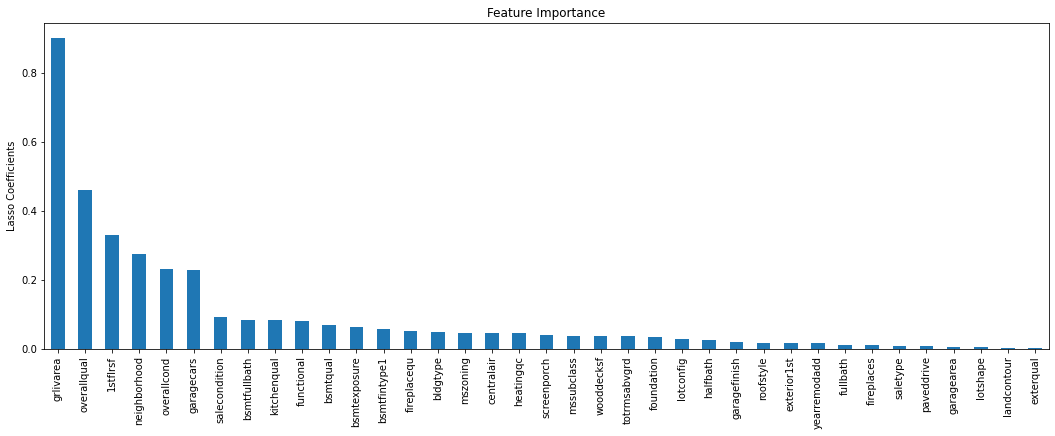

In [26]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

In [27]:
# we are happy to our model, so we save it to be able
# to score new data

joblib.dump(lin_model, 'linear_regression.joblib') 

['linear_regression.joblib']